# Exercises for Session 7: Web Scraping 2

In session 6 you learned how to download the HTML of a webpage. In this session you will learn how to locate the information you want in the HTML. It requires an understanding of how HTML is structured and methods to navigate the structure. In the exercises below you will mainly use the package `BeautifulSoup` to navigate the HTML (read more about BeautifulSoup in the [documentation](https://www.crummy.com/software/BeautifulSoup/bs4/doc/)).

# Part 1: Parsing a table from HTML using BeautifulSoup.

In this exercise you will learn how to extract the information you want from a webpage's HTML. `BeautifulSoup` is a useful package in Python that makes it easy to navigate the HTML and find the information you are looking for. 

The purpose of the exercise is to extract the data that are available on this webpage: https://www.basketball-reference.com/leagues/NBA_2018.html

Before working with the exercise, you should watch the 2 videos (7.1 and 7.2) below. The type of data you shall scrape in the exercise is quite different from what you see in the video: In the video we scrape text from articles; in the exercise you will scrape tables and make them into pandas DataFrames. 
Keep in mind that the principles are completely identical: You need to locate the information in the HTML and then convert it to some meaningful data (it could be a text file or a dataframe)

(I might talk a bit slow in some of the videos. Remember that you can turn up the speed on Youtube)

In [3]:
import requests
from bs4 import BeautifulSoup
import pandas as pd

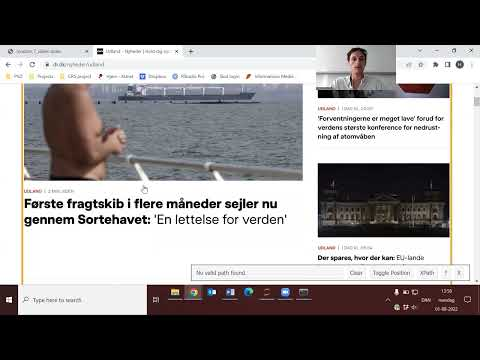

In [1]:
from IPython.display import YouTubeVideo
YouTubeVideo('gs0xktunF-g', width=640, height=360)

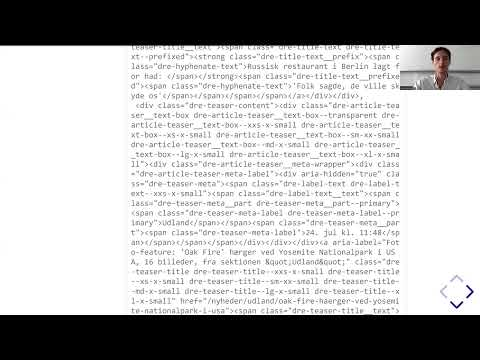

In [2]:
YouTubeVideo('GSUw069jOo8', width=640, height=360)

> **Ex. 7.1.1:** Open https://www.basketball-reference.com/leagues/NBA_2018.html. Download the webpage's HTML as you have done before with `Requests`. We want to locate the conference standings of the Eastern Conference in the HTML. 

> Go to "Elements" in the Chrome Developer Tools and find the Eastern Conference table in the HTML. Use `BeautifulSoup` to parse the HTML, so you only have the HTML of the Eastern Conference table.

> *Hint:* What [tag name](https://www.w3schools.com/TAgs/default.asp) is used for tables? And what [attribute](https://www.w3schools.com/html/html_attributes.asp) identifies the table? Use it to select the table.

In [14]:
# YOUR CODE HERE
url = 'https://www.basketball-reference.com/leagues/NBA_2018.html'
response = requests.get(url)
soup = BeautifulSoup(response.content, 'lxml') #Make the BeautifulSoup object (soup): Take the HTML content as input and choose your parser (lxml)
soup

<!DOCTYPE html>
<html class="no-js" data-root="/home/bbr/build" data-version="klecko-" lang="en">
<head>
<meta charset="utf-8"/>
<meta content="ie=edge" http-equiv="x-ua-compatible"/>
<meta content="width=device-width, initial-scale=1.0, maximum-scale=2.0" name="viewport"/>
<link href="https://d2p3bygnnzw9w3.cloudfront.net/req/202207051" rel="dns-prefetch"/>
<!-- Quantcast Choice. Consent Manager Tag v2.0 (for TCF 2.0) -->
<script async="true" type="text/javascript">
    (function() {
	var host = window.location.hostname;
	var element = document.createElement('script');
	var firstScript = document.getElementsByTagName('script')[0];
	var url = 'https://quantcast.mgr.consensu.org'
	    .concat('/choice/', 'XwNYEpNeFfhfr', '/', host, '/choice.js')
	var uspTries = 0;
	var uspTriesLimit = 3;
	element.async = true;
	element.type = 'text/javascript';
	element.src = url;
	
	firstScript.parentNode.insertBefore(element, firstScript);
	
	function makeStub() {
	    var TCF_LOCATOR_NAME = '__tcfapi

In [22]:
#soup.select('div.standings_confs.data_grid.section_wrapper')[0].text #Selecting first title
#div#div_confs_standings_E.table_container.is_setup

In [24]:
soup.select('div#all_confs_standings_E.table_wrapper')[0].text #Selecting first title

'\n\nConference Standings \n* Playoff teams\n\n\n\n\n\nConference Standings Table\n\n\n\nEastern Conference\nW\nL\nW/L%\nGB\nPS/G\nPA/G\nSRS\n\n\nToronto Raptors*5923.720—111.7103.97.29\nBoston Celtics*5527.6714.0104.0100.43.23\nPhiladelphia 76ers*5230.6347.0109.8105.34.30\nCleveland Cavaliers*5032.6109.0110.9109.90.59\nIndiana Pacers*4834.58511.0105.6104.21.18\nMiami Heat*4438.53715.0103.4102.90.15\nMilwaukee Bucks*4438.53715.0106.5106.8-0.45\nWashington Wizards*4339.52416.0106.6106.00.53\nDetroit Pistons3943.47620.0103.8103.9-0.26\nCharlotte Hornets3646.43923.0108.2108.00.07\nNew York Knicks2953.35430.0104.5108.0-3.53\nBrooklyn Nets2854.34131.0106.6110.3-3.67\nChicago Bulls2755.32932.0102.9110.0-6.84\nOrlando Magic2557.30534.0103.4108.2-4.92\nAtlanta Hawks2458.29335.0103.4108.8-5.30\n\n\n'

Now you have located the table. Inspect the table in "Elements" in Chrome Developer Tools and notice how a table is written in HTML. Ask yourself: Which tag names can be used to locate rows? And columns/headers? In the following exercises we use these tag names to download the data in the table.

> **Ex. 7.1.2:** Use `find_all` to search for the columns/headers of the table. Loop through all the columns to extract the text of each column. Store the columns in a list.

> *Hint:* Notice that the table consists of a thead and tbody. The columns are located in the thead.

In [54]:
# YOUR CODE HERE # YOUR CODE HERE
col = soup.find_all('thead')[0].text #(class_ is used because class is reserved in Python)
col = col.split()
columns = []
for c in col:
    if not c == '':
        columns.append(c)
columns

['Eastern', 'Conference', 'W', 'L', 'W/L%', 'GB', 'PS/G', 'PA/G', 'SRS']

> **Ex. 7.1.3:** Now locate the rows (the rows are in tbody). Use `find_all` to locate all rows in the table and store in a list called *rows_list*.

In [100]:
row_names = soup.select('th.left')[1:16]
row_names

[<th class="left" data-stat="team_name" scope="row"><a href="/teams/TOR/2018.html">Toronto Raptors</a>*</th>,
 <th class="left" data-stat="team_name" scope="row"><a href="/teams/BOS/2018.html">Boston Celtics</a>*</th>,
 <th class="left" data-stat="team_name" scope="row"><a href="/teams/PHI/2018.html">Philadelphia 76ers</a>*</th>,
 <th class="left" data-stat="team_name" scope="row"><a href="/teams/CLE/2018.html">Cleveland Cavaliers</a>*</th>,
 <th class="left" data-stat="team_name" scope="row"><a href="/teams/IND/2018.html">Indiana Pacers</a>*</th>,
 <th class="left" data-stat="team_name" scope="row"><a href="/teams/MIA/2018.html">Miami Heat</a>*</th>,
 <th class="left" data-stat="team_name" scope="row"><a href="/teams/MIL/2018.html">Milwaukee Bucks</a>*</th>,
 <th class="left" data-stat="team_name" scope="row"><a href="/teams/WAS/2018.html">Washington Wizards</a>*</th>,
 <th class="left" data-stat="team_name" scope="row"><a href="/teams/DET/2018.html">Detroit Pistons</a></th>,
 <th cla

In [112]:
rows = soup.find_all('tbody')[0].text.split('\n')
rows

['Toronto Raptors*5923.720—111.7103.97.29',
 'Boston Celtics*5527.6714.0104.0100.43.23',
 'Philadelphia 76ers*5230.6347.0109.8105.34.30',
 'Cleveland Cavaliers*5032.6109.0110.9109.90.59',
 'Indiana Pacers*4834.58511.0105.6104.21.18',
 'Miami Heat*4438.53715.0103.4102.90.15',
 'Milwaukee Bucks*4438.53715.0106.5106.8-0.45',
 'Washington Wizards*4339.52416.0106.6106.00.53',
 'Detroit Pistons3943.47620.0103.8103.9-0.26',
 'Charlotte Hornets3646.43923.0108.2108.00.07',
 'New York Knicks2953.35430.0104.5108.0-3.53',
 'Brooklyn Nets2854.34131.0106.6110.3-3.67',
 'Chicago Bulls2755.32932.0102.9110.0-6.84',
 'Orlando Magic2557.30534.0103.4108.2-4.92',
 'Atlanta Hawks2458.29335.0103.4108.8-5.30',
 '']

In [78]:
# YOUR CODE HERE
row_list = []
row = soup.find_all('tbody', class_='td.right') 
#row = soup.select('td.right')[115].text
row_list = []
for r in range(0,7*15):
    row_list.append(soup.select('td.right')[r].text)    
#row.select('wins')
#row = row.text.strip() #Use strip() to get rid of trailing and leading spaces
#row_list.append(row)
#row_list

> **Ex. 7.1.4:** Loop through all rows in *rows_list* and extract the values. 

> *Hint:* Since the values in a row have different tags ("th" or "tr") we cannot use `find_all` to go through all values (`find_all` is used when the tag is the same). Instead we can use `.children` to get all values (/children) in each row. 
> 
> 1. Loop through the values in each row with a `for loop` to get all the values of the row and store in a list (use `append` to append to list).
>
> 2. Once you have constructed such a loop, you can construct another for loop around it that loops through all the rows in *rows_list*. Your outcome should be a list of the lists of all the row values (again use `append` to do this).
> - Your outcome should look like this: 
> 
> ```[['Toronto Raptors*', '59', '23', '.720', '—', '111.7', '103.9', '7.29'],
 ['Boston Celtics*', '55', '27', '.671', '4.0', '104.0', '100.4', '3.23'],
 ...]```

In [122]:
# YOUR CODE HERE
t = 1
t2 = 7
rows_list = []
for r in range(1,16):
    v = []
    v.append(soup.select('th.left')[r].text)
    for n in range(t,t2):
        v.append(soup.select('td.right')[n].text)
        t += 7
        t2 += 7
    rows_list.append(v)
rows_list

[['Toronto Raptors*', '23', '.720', '—', '111.7', '103.9', '7.29'],
 ['Boston Celtics*', '38', '.537', '15.0', '106.5', '106.8', '-0.45'],
 ['Philadelphia 76ers*', '55', '.329', '32.0', '102.9', '110.0', '-6.84'],
 ['Cleveland Cavaliers*', '34', '.585', '17.0', '107.9', '104.4', '3.42'],
 ['Indiana Pacers*', '40', '.512', '23.0', '109.0', '109.0', '0.15'],
 ['Miami Heat*', '23', '.720', '—', '111.7', '103.9', '7.29'],
 ['Milwaukee Bucks*', '34', '.585', '2.0', '105.6', '104.2', '1.18'],
 ['Washington Wizards*', '46', '.439', '8.0', '108.2', '108.0', '0.07'],
 ['Detroit Pistons', '35', '.573', '2.0', '109.5', '107.3', '2.35'],
 ['Charlotte Hornets', '61', '.256', '37.0', '103.9', '113.3', '-8.80'],
 ['New York Knicks', '240.6', '42.8', '85.1', '.503', '11.3', '28.9'],
 ['Brooklyn Nets', '13.8', '19.5', '112.4', '82', '243.4', '42.7'],
 ['Chicago Bulls', '44.0', '24.3', '7.6', '6.1', '13.4', '21.7'],
 ['Orlando Magic', '22.3', '.767', '11.0', '33.5', '44.5', '25.1'],
 ['Atlanta Hawks', '

In [137]:
row_names = soup.select('th.left')
rows = soup.find_all('tbody')[0]
child_list = []
for child in rows.children:
    child_list.append(child.text)
child_list
#row_names

['Toronto Raptors*5923.720—111.7103.97.29',
 '\n',
 'Boston Celtics*5527.6714.0104.0100.43.23',
 '\n',
 'Philadelphia 76ers*5230.6347.0109.8105.34.30',
 '\n',
 'Cleveland Cavaliers*5032.6109.0110.9109.90.59',
 '\n',
 'Indiana Pacers*4834.58511.0105.6104.21.18',
 '\n',
 'Miami Heat*4438.53715.0103.4102.90.15',
 '\n',
 'Milwaukee Bucks*4438.53715.0106.5106.8-0.45',
 '\n',
 'Washington Wizards*4339.52416.0106.6106.00.53',
 '\n',
 'Detroit Pistons3943.47620.0103.8103.9-0.26',
 '\n',
 'Charlotte Hornets3646.43923.0108.2108.00.07',
 '\n',
 'New York Knicks2953.35430.0104.5108.0-3.53',
 '\n',
 'Brooklyn Nets2854.34131.0106.6110.3-3.67',
 '\n',
 'Chicago Bulls2755.32932.0102.9110.0-6.84',
 '\n',
 'Orlando Magic2557.30534.0103.4108.2-4.92',
 '\n',
 'Atlanta Hawks2458.29335.0103.4108.8-5.30',
 '\n']

In [150]:
rows = soup.find_all('tbody')[0]
t = rows.find_all('tr')
rows_list = [[v.text for v in t.findChildren(recursive=True)] for t in t]
rows_list = [item[1:] for item in rows_list]
rows_list
#for c in rows_list:
 #   c.pop[0]

[['Toronto Raptors', '59', '23', '.720', '—', '111.7', '103.9', '7.29'],
 ['Boston Celtics', '55', '27', '.671', '4.0', '104.0', '100.4', '3.23'],
 ['Philadelphia 76ers', '52', '30', '.634', '7.0', '109.8', '105.3', '4.30'],
 ['Cleveland Cavaliers', '50', '32', '.610', '9.0', '110.9', '109.9', '0.59'],
 ['Indiana Pacers', '48', '34', '.585', '11.0', '105.6', '104.2', '1.18'],
 ['Miami Heat', '44', '38', '.537', '15.0', '103.4', '102.9', '0.15'],
 ['Milwaukee Bucks', '44', '38', '.537', '15.0', '106.5', '106.8', '-0.45'],
 ['Washington Wizards', '43', '39', '.524', '16.0', '106.6', '106.0', '0.53'],
 ['Detroit Pistons', '39', '43', '.476', '20.0', '103.8', '103.9', '-0.26'],
 ['Charlotte Hornets', '36', '46', '.439', '23.0', '108.2', '108.0', '0.07'],
 ['New York Knicks', '29', '53', '.354', '30.0', '104.5', '108.0', '-3.53'],
 ['Brooklyn Nets', '28', '54', '.341', '31.0', '106.6', '110.3', '-3.67'],
 ['Chicago Bulls', '27', '55', '.329', '32.0', '102.9', '110.0', '-6.84'],
 ['Orlando M

> **Ex. 7.1.5:** Combine your answers to **Ex. 7.1.2-4** to make a function called *parse_html_table* that creates a DataFrame from the HTML.

> *Hint:* The only new thing you need to do is to create a DataFrame out of the list of lists you made in ex. 7.1.4.
>
> Try to search on google to figure out how to make a dataframe out of a list of lists.

In [158]:
# YOUR CODE HERE
table_node = soup.find(id = 'confs_standings_E') 
#def parse_html_table(html):
columns_html = table_node.thead.find_all('th')
# Extract the text
columns = [col.text for col in columns_html] 
df_list = pd.DataFrame(rows_list, columns=columns)
df_list

,Eastern Conference,W,L,W/L%,GB,PS/G,PA/G,SRS
0,Toronto Raptors,59,23,.720,—,111.7,103.9,7.29
1,Boston Celtics,55,27,.671,4.0,104.0,100.4,3.23
2,Philadelphia 76ers,52,30,.634,7.0,109.8,105.3,4.30
3,Cleveland Cavaliers,50,32,.610,9.0,110.9,109.9,0.59
4,Indiana Pacers,48,34,.585,11.0,105.6,104.2,1.18
5,Miami Heat,44,38,.537,15.0,103.4,102.9,0.15
6,Milwaukee Bucks,44,38,.537,15.0,106.5,106.8,-0.45
7,Washington Wizards,43,39,.524,16.0,106.6,106.0,0.53
8,Detroit Pistons,39,43,.476,20.0,103.8,103.9,-0.26
9,Charlotte Hornets,36,46,.439,23.0,108.2,108.0,0.07


> **Ex. 7.1.6:** Now instead of only looking at the Eastern Conference standings table we want to get the data of all tables on the webpage. 

> 1. Locate all tables on the page by using `find_all` to search for the table tag name (```<table>```). Name the list of tables as "tables".

> 2. Use your function *parse_html_table* to loop through all tables in "tables" and parse their data. Store all the dataframes in a list.
>
> *Hint:* You need to make a for loop with two lines of code in it: 
>- in the first line you use your function *parse_html_table* to make a dataframe, 
>- and in the second line you append the dataframe to an empty list of dataframes that you have made before the loop.

In [161]:
# YOUR CODE HERE

> **Ex. 7.1.7 (extra) :** `Pandas` has a built-in function called `read_html` that does the exact same thing as you have just learned. Compare your results to this Pandas implementation ([pd.read_html](https://pandas.pydata.org/pandas-docs/stable/reference/api/pandas.read_html.html)). 

> *Note:* It may seem like a lot of work to go through all the steps when there is a function that does it already. However, the purpose of the exercises above is to prepare you for your own scraping challenges, and that is best done by hard coding everything. It is also important to note that scraping is no exact science, so there may be websites where the general function `read_html` does not work. In those cases, you should be able to build your own scraper.

In [162]:
# YOUR CODE HERE
url = 'https://www.basketball-reference.com/leagues/NBA_2018.html' # Link to the website
dfs = pd.read_html(url) # Parses all tables found on the page.
dfs[0]

,Eastern Conference,W,L,W/L%,GB,PS/G,PA/G,SRS
0,Toronto Raptors*,59,23,0.720,—,111.7,103.9,7.29
1,Boston Celtics*,55,27,0.671,4.0,104.0,100.4,3.23
2,Philadelphia 76ers*,52,30,0.634,7.0,109.8,105.3,4.30
3,Cleveland Cavaliers*,50,32,0.610,9.0,110.9,109.9,0.59
4,Indiana Pacers*,48,34,0.585,11.0,105.6,104.2,1.18
5,Miami Heat*,44,38,0.537,15.0,103.4,102.9,0.15
6,Milwaukee Bucks*,44,38,0.537,15.0,106.5,106.8,-0.45
7,Washington Wizards*,43,39,0.524,16.0,106.6,106.0,0.53
8,Detroit Pistons,39,43,0.476,20.0,103.8,103.9,-0.26
9,Charlotte Hornets,36,46,0.439,23.0,108.2,108.0,0.07
